## Module 1 Homework

In this homework, we're going to download finance data from various sources and make simple calculations/analysis.

---

In [2]:
# install main library YFinance
#!pip install yfinance

In [34]:
# IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date
import datetime as dt


In [6]:
end = date.today()
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

start = date(year=end.year-70, month=end.month, day=end.day)
print(f'Period for indexes: {start} to {end} ')

Year = 2024; month= 4; day=24
Period for indexes: 1954-04-24 to 2024-04-24 


### Question 1: [Macro] Average growth of GDP in 2023

**What is the average growth (in %) of GDP in 2023?**

Download the timeseries Real Gross Domestic Product (GDPC1) from FRED (https://fred.stlouisfed.org/series/GDPC1). 
Calculate year-over-year (YoY) growth rate (that is, divide current value to one 4 quarters ago). Find the average YoY growth in 2023 (average from 4 YoY numbers).
Round to 1 digit after the decimal point: e.g. if you get 5.66% growth => you should answer  5.7

---

In [8]:
# Real Gross Domestic Product (GDPC1), Billions of Chained 2012 Dollars, QUARTERLY
# https://fred.stlouisfed.org/series/GDPC1
gdpc1= pdr.DataReader("GDPC1", "fred", start=start)

In [15]:
gdpc1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 278 entries, 1954-07-01 to 2023-10-01
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GDPC1         278 non-null    float64
 1   gdpc1_us_yoy  274 non-null    float64
 2   gdpc1_us_qoq  277 non-null    float64
dtypes: float64(3)
memory usage: 8.7 KB


In [11]:
gdpc1['gdpc1_us_yoy'] = gdpc1.GDPC1/gdpc1.GDPC1.shift(4)-1
gdpc1['gdpc1_us_qoq'] = gdpc1.GDPC1/gdpc1.GDPC1.shift(1)-1
gdpc1.tail()

,GDPC1,gdpc1_us_yoy,gdpc1_us_qoq
DATE,,,
2022-10-01,21989.981,0.006517,0.006354
2023-01-01,22112.329,0.017179,0.005564
2023-04-01,22225.350,0.023825,0.005111
2023-07-01,22490.692,0.029269,0.011939
2023-10-01,22679.255,0.031345,0.008384


In [37]:
gdpavg_2023 = gdpc1[gdpc1.index.year == 2023]
print(gdpavg_2023)

                GDPC1  gdpc1_us_yoy  gdpc1_us_qoq
DATE                                             
2023-01-01  22112.329      0.017179      0.005564
2023-04-01  22225.350      0.023825      0.005111
2023-07-01  22490.692      0.029269      0.011939
2023-10-01  22679.255      0.031345      0.008384


In [38]:
print(f'The average YoY growth rate of real GDP in 2023 was: {(100*gdpavg_2023.gdpc1_us_yoy.mean()).round(1)}%')

The average YoY growth rate of real GDP in 2023 was: 2.5%


# Question 2. [Macro] Inverse "Treasury Yield"

**Find the min value of (dgs10-dgs2) after since year 2000 (2000-01-01) and write it down as an answer, round to 1 digit after the decimal point.**


Download DGS2 and DGS10 interest rates series (https://fred.stlouisfed.org/series/DGS2,
 https://fred.stlouisfed.org/series/DGS10). Join them together to one dataframe on date (you might need to read about pandas.DataFrame.join()), calculate the difference dgs10-dgs2 daily.

(Additional: think about what does the "inverted yield curve" mean for the market and investors? do you see the same thing in your country/market of interest? Do you think it can be a good predictive feature for the models?)

---

In [27]:
# https://fred.stlouisfed.org/series/DGS10
dgs10 = pdr.DataReader("DGS10", "fred", start=start)
dgs10.tail()

,DGS10
DATE,
2024-04-16,4.67
2024-04-17,4.59
2024-04-18,4.64
2024-04-19,4.62
2024-04-22,4.62


In [28]:
# https://fred.stlouisfed.org/series/DGS2
dgs2 = pdr.DataReader("DGS2", "fred", start=start)
dgs2.tail()

,DGS2
DATE,
2024-04-16,4.97
2024-04-17,4.93
2024-04-18,4.98
2024-04-19,4.97
2024-04-22,4.97


In [42]:
dgs10_2 = dgs10.copy().join(dgs2)
dgs10_2['delta'] = dgs10_2.DGS10-dgs10_2.DGS2
dgs10_2.tail()

,DGS10,DGS2,delta
DATE,,,
2024-04-16,4.67,4.97,-0.30
2024-04-17,4.59,4.93,-0.34
2024-04-18,4.64,4.98,-0.34
2024-04-19,4.62,4.97,-0.35
2024-04-22,4.62,4.97,-0.35


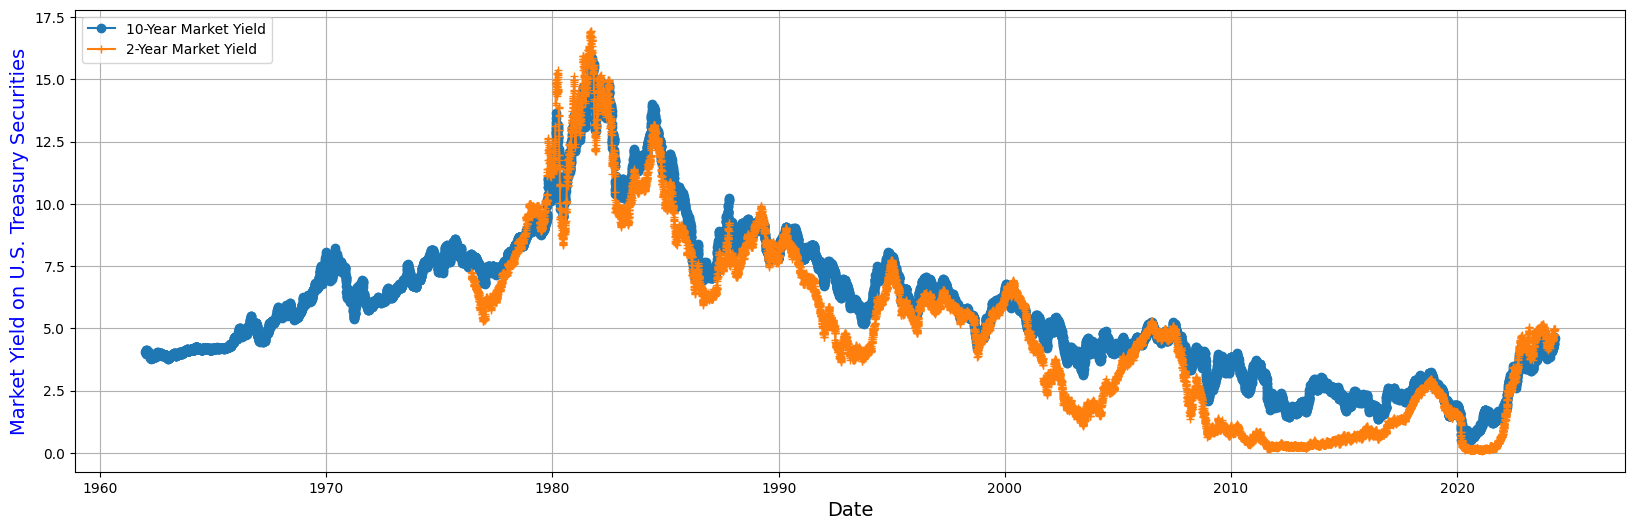

In [47]:
# DGS10 and DGS2
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under US potential GDP curve
# ax.fill_between(fedfunds.index, fedfunds.FEDFUNDS, color="red", alpha=0.3, label="Core CPI index (monthly)")

# # Creating a secondary y-axis for GDP growth percentage
# ax2 = ax.twinx()
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.plot(dgs10_2.index, dgs10_2.DGS10, marker="o", label="10-Year Market Yield")
ax.plot(dgs10_2.index, dgs10_2.DGS2, marker="+", label="2-Year Market Yield")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Market Yield on U.S. Treasury Securities", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

plt.show()

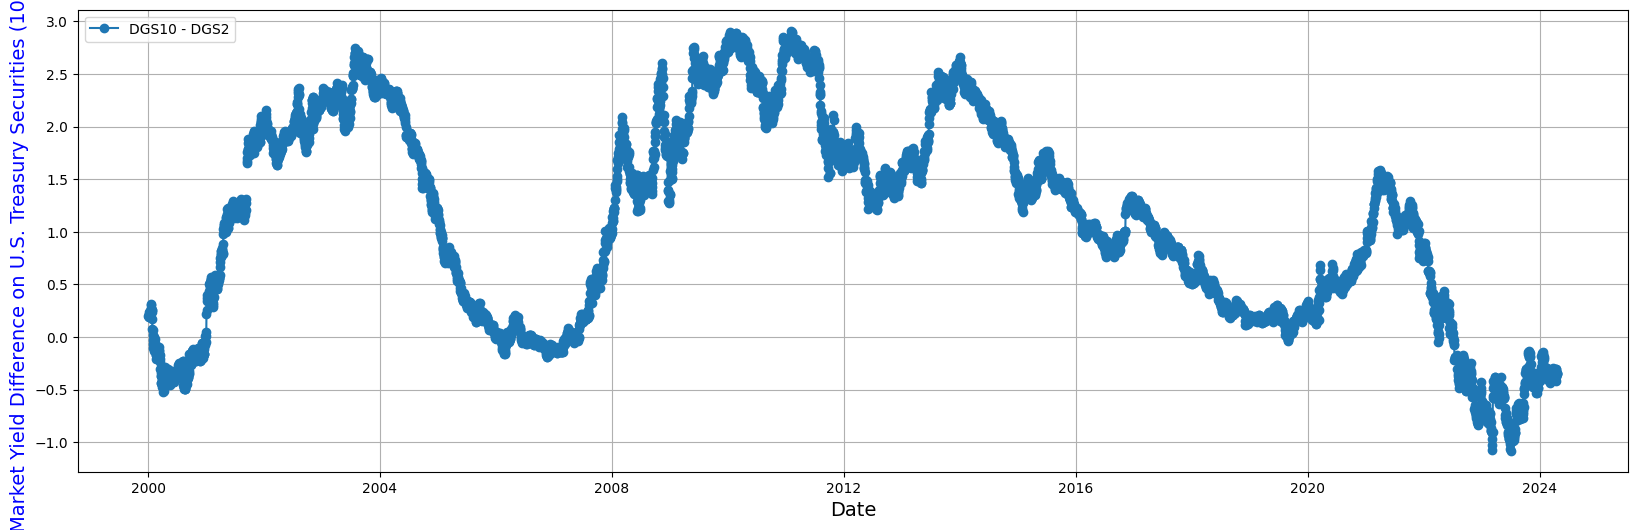

In [49]:
# DGS10 and DGS2
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under US potential GDP curve
# ax.fill_between(fedfunds.index, fedfunds.FEDFUNDS, color="red", alpha=0.3, label="Core CPI index (monthly)")

# # Creating a secondary y-axis for GDP growth percentage
# ax2 = ax.twinx()
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.plot(dgs10_2[dgs10_2.index.year >= 2000].index, dgs10_2[dgs10_2.index.year >= 2000].delta, marker="o", label="DGS10 - DGS2")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Market Yield Difference on U.S. Treasury Securities (10y-2y)", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

plt.show()

In [44]:
dgs10_2[dgs10_2.index.year >= 2000].head()

,DGS10,DGS2,delta
DATE,,,
2000-01-03,6.58,6.38,0.20
2000-01-04,6.49,6.30,0.19
2000-01-05,6.62,6.38,0.24
2000-01-06,6.57,6.35,0.22
2000-01-07,6.52,6.31,0.21


In [46]:
print(f'The min value of (dgs10-dgs2) since year 2000 is: {dgs10_2[dgs10_2.index.year >= 2000].delta.min().round(1)}%')

The min value of (dgs10-dgs2) since year 2000 is: -1.1%


### Question 3. [Index] Which Index is better recently?

**Compare S&P 500 and IPC Mexico indexes by the 5 year growth and write down the largest value as an answer (%)**

Download on Yahoo Finance two daily index prices for S&P 500 (^GSPC, https://finance.yahoo.com/quote/%5EGSPC/) and IPC Mexico (^MXX, https://finance.yahoo.com/quote/%5EMXX/). Compare 5Y growth for both (between 2019-04-09 and 2024-04-09). Select the higher growing index and write down the growth in % (closest integer %). E.g. if ratio end/start was 2.0925 (or growth of 109.25%), you need to write down 109 as your answer.

(Additional: think of other indexes and try to download stats and compare the growth? Do create 10Y and 20Y growth stats. What is an average yearly growth rate (CAGR) for each of the indexes you select?)

---

In [50]:
# https://finance.yahoo.com/quote/%5EGSPC/
# SNP - SNP Real Time Price. Currency in USD
snp500_daily_non_delayed = yf.download(tickers = "^GSPC",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [51]:
snp500_daily_non_delayed.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-18,5031.520020,5056.660156,5001.890137,5011.120117,5011.120117,3619760000
2024-04-19,5005.439941,5019.020020,4953.560059,4967.229980,4967.229980,3878750000
2024-04-22,4987.330078,5038.839844,4969.399902,5010.600098,5010.600098,3820250000
2024-04-23,5028.850098,5076.120117,5027.959961,5070.549805,5070.549805,3751400000
2024-04-24,5084.859863,5089.479980,5047.020020,5066.709961,5066.709961,1667677000


In [52]:
# https://finance.yahoo.com/quote/%5EMXX/
# IPC Mexico
IPCMex_daily = yf.download(tickers = "^MXX",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [53]:
IPCMex_daily.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-18,55597.789062,55941.621094,55585.820312,55739.429688,55739.429688,208671900
2024-04-19,55811.191406,56036.718750,55579.691406,55862.851562,55862.851562,138617600
2024-04-22,55852.281250,56615.878906,55771.550781,56551.898438,56551.898438,183161700
2024-04-23,56564.578125,56906.800781,56300.359375,56633.750000,56633.750000,204292000
2024-04-24,56622.160156,56827.019531,56188.890625,56704.578125,56704.578125,112836040


In [76]:
snp_5yr = snp500_daily_non_delayed.loc['2024-04-09', 'Close'] - snp500_daily_non_delayed.loc['2019-04-09', 'Close']
Ipcmex_5yr = IPCMex_daily.loc['2024-04-09', 'Close'] - IPCMex_daily.loc['2019-04-09', 'Close']

In [77]:
print(f'5Y growth for S&P 500: {snp_5yr}')
print(f'5Y growth for IPC Mexico: {Ipcmex_5yr}')

5Y growth for S&P 500: 2331.710205078125
5Y growth for IPC Mexico: 12419.51953125


In [80]:
ipcmex_5yr_pct  = 100*Ipcmex_5yr / IPCMex_daily.loc['2019-04-09', 'Close']
print(f'5Y growth for IPC Mexico: {ipcmex_5yr_pct.round(0)}%')

5Y growth for IPC Mexico: 28.0%


### Question 4. [Stocks OHLCV] 52-weeks range ratio (2023) for the selected stocks


**Find the largest range ratio [=(max-min)/max] of Adj.Close prices in 2023**


Download the 2023 daily OHLCV data on Yahoo Finance for top6 stocks on earnings (https://companiesmarketcap.com/most-profitable-companies/): 2222.SR,BRK-B, AAPL, MSFT, GOOG, JPM.

Here is the example data you should see in Pandas for "2222.SR": https://finance.yahoo.com/quote/2222.SR/history

Calculate maximum-minimim "Adj.Close" price for each stock and divide it by the maximum "Adj.Close" value.
Round the result to two decimal places (e.g. 0.1575 will be 0.16)

(Additional: why this may be important for your research?)

---

In [142]:
def download_stock_data(ticker_symbols):
    # Create an empty dictionary to store the results
    stock_data_dict = {}

    # Loop through each ticker symbol in the list
    for symbol in ticker_symbols:
        # Download daily stock data using Yahoo Finance
        stock_data = yf.download(tickers=symbol, period="max", interval="1d")

        # Create a key using the symbol followed by '_daily'
        key = f"{symbol}"

        # Store the DataFrame in the dictionary
        stock_data_dict[key] = stock_data

    # Return the dictionary containing all the dataframes
    return stock_data_dict


In [143]:
tickers = ['2222.SR', 'BRK-B', 'AAPL', 'MSFT', 'GOOG', 'JPM']
top6_daily = download_stock_data(tickers)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [144]:
top6_daily.keys()

dict_keys(['2222.SR', 'BRK-B', 'AAPL', 'MSFT', 'GOOG', 'JPM'])

In [146]:
top6_daily['2222.SR'].tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-18,30.000000,30.049999,29.85,29.900000,29.900000,7985988
2024-04-21,30.000000,30.200001,29.90,30.049999,30.049999,8988623
2024-04-22,30.100000,30.299999,30.00,30.150000,30.150000,12033500
2024-04-23,30.200001,30.299999,30.00,30.100000,30.100000,6951340
2024-04-24,30.100000,30.200001,30.00,30.100000,30.100000,9461809


In [147]:
def calculate_yearly_range_ratios(stock_dict, year):
    stock_ratios_dict = {}
    
    for key in stock_dict.keys():
        # Create a key using the symbol followed by '_daily'
        ratio_key = f"{key}_{year}_ratio"
        
        daily_frame = stock_dict[key]
        yearly_ratio = (daily_frame[daily_frame.index.year == year]['Adj Close'].max() - 
                        daily_frame[daily_frame.index.year == year]['Adj Close'].min()) / \
                        daily_frame[daily_frame.index.year == year]['Adj Close'].max()

        # Store the DataFrame in the dictionary
        stock_ratios_dict[ratio_key] = yearly_ratio.round(2)

    # Return the dictionary containing all the dataframes
    return stock_ratios_dict


In [148]:
calculate_yearly_range_ratios(top6_daily, 2023)

{'2222.SR_2023_ratio': 0.21,
 'BRK-B_2023_ratio': 0.21,
 'AAPL_2023_ratio': 0.37,
 'MSFT_2023_ratio': 0.42,
 'GOOG_2023_ratio': 0.39,
 'JPM_2023_ratio': 0.28}

### Question 5. [Stocks] Dividend Yield
**Find the largest dividend yield for the same set of stocks**

Use the same list of companies (2222.SR,BRK-B, AAPL, MSFT, GOOG, JPM) and download all dividends paid in 2023.
You can use `get_actions()` method or `.dividends` field in yfinance library (https://github.com/ranaroussi/yfinance?tab=readme-ov-file#quick-start)

Sum up all dividends paid in 2023 per company and divide each value by the closing price (Adj.Close) at the last trading day of the year.

Find the maximum value in % and round to 1 digit after the decimal point. (E.g., if you obtained $1.25 dividends paid and the end year stock price is $100, the dividend yield is 1.25% -- and your answer should be equal to 1.3)

---

In [149]:
def download_stock_actions(ticker_symbols):
    # Create an empty dictionary to store the results
    stock_action_dict = {}

    # Loop through each ticker symbol in the list
    for symbol in ticker_symbols:
        # Download daily stock data using Yahoo Finance
        ticker = yf.Ticker(symbol)

        # Create a key using the symbol followed by '_daily'
        key = f"{symbol}_actions"

        # Store the DataFrame in the dictionary
        stock_action_dict[key] = ticker.get_actions()

    # Return the dictionary containing all the dataframes
    return stock_action_dict

In [150]:
top6_actions = download_stock_actions(tickers)

In [151]:
top6_actions.keys()

dict_keys(['2222.SR_actions', 'BRK-B_actions', 'AAPL_actions', 'MSFT_actions', 'GOOG_actions', 'JPM_actions'])

In [152]:
top6_actions['JPM_actions'].tail()

,Dividends,Stock Splits
Date,,
2023-04-05 00:00:00-04:00,1.00,0.0
2023-07-05 00:00:00-04:00,1.00,0.0
2023-10-05 00:00:00-04:00,1.05,0.0
2024-01-04 00:00:00-05:00,1.05,0.0
2024-04-04 00:00:00-04:00,1.15,0.0


In [ ]:
def calculate_dividend_yield(symbols, year):
    

### Question 6. [Exploratory] Investigate new metrics

**Free text answer**

Download and explore a few additional metrics or time series that might be valuable for your project and write down why (briefly).

---

### Question 7. [Exploratory] Time-driven strategy description around earnings releases

**Free text answer**

Explore earning dates for the whole month of April - e.g. using YahooFinance earnings calendar (https://finance.yahoo.com/calendar/earnings?from=2024-04-21&to=2024-04-27&day=2024-04-23). Compare with the previous closed earnings (e.g., recent dates with full data https://finance.yahoo.com/calendar/earnings?from=2024-04-07&to=2024-04-13&day=2024-04-08). 

Describe an analytical strategy/idea (you're not required to implement it) to select a subset companies of interest based on the future events data.
